# Power Rangers Franchise

[#TidyTuesday challenge](https://github.com/rfordatascience/tidytuesday/blob/master/data/2024/2024-08-27/readme.md) week 35 using the [Kaggle Power Rangers dataset](https://www.kaggle.com/datasets/karetnikovn/power-rangers-dataset/data)

Played around with pypalettes, but didn't need to use it in the end as I went with matplotlib's "cool" colour palette.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pypalettes import load_cmap
from pypalettes import get_hex
import numpy as np

#for colorbar
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib import colors

from matplotlib import font_manager
#font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

## Load data

In [2]:
episodes = pd.read_csv("power_rangers_episodes.csv")
seasons = pd.read_csv("power_rangers_seasons.csv")

In [3]:
# merge season data
df = pd.merge(episodes, seasons, left_on="season_title", right_on="season_title", how="left")
df = df.rename(columns={"IMDB_rating_y": "IMDB_rating_season", "IMDB_rating_x": "IMDB_rating"})

## Visualise

### Stripplot

In [4]:
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\NotoSansTC-Bold.otf')
subtitle_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\NotoSansTC-Medium.otf')
label_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\NotoSansTC-Regular.otf')

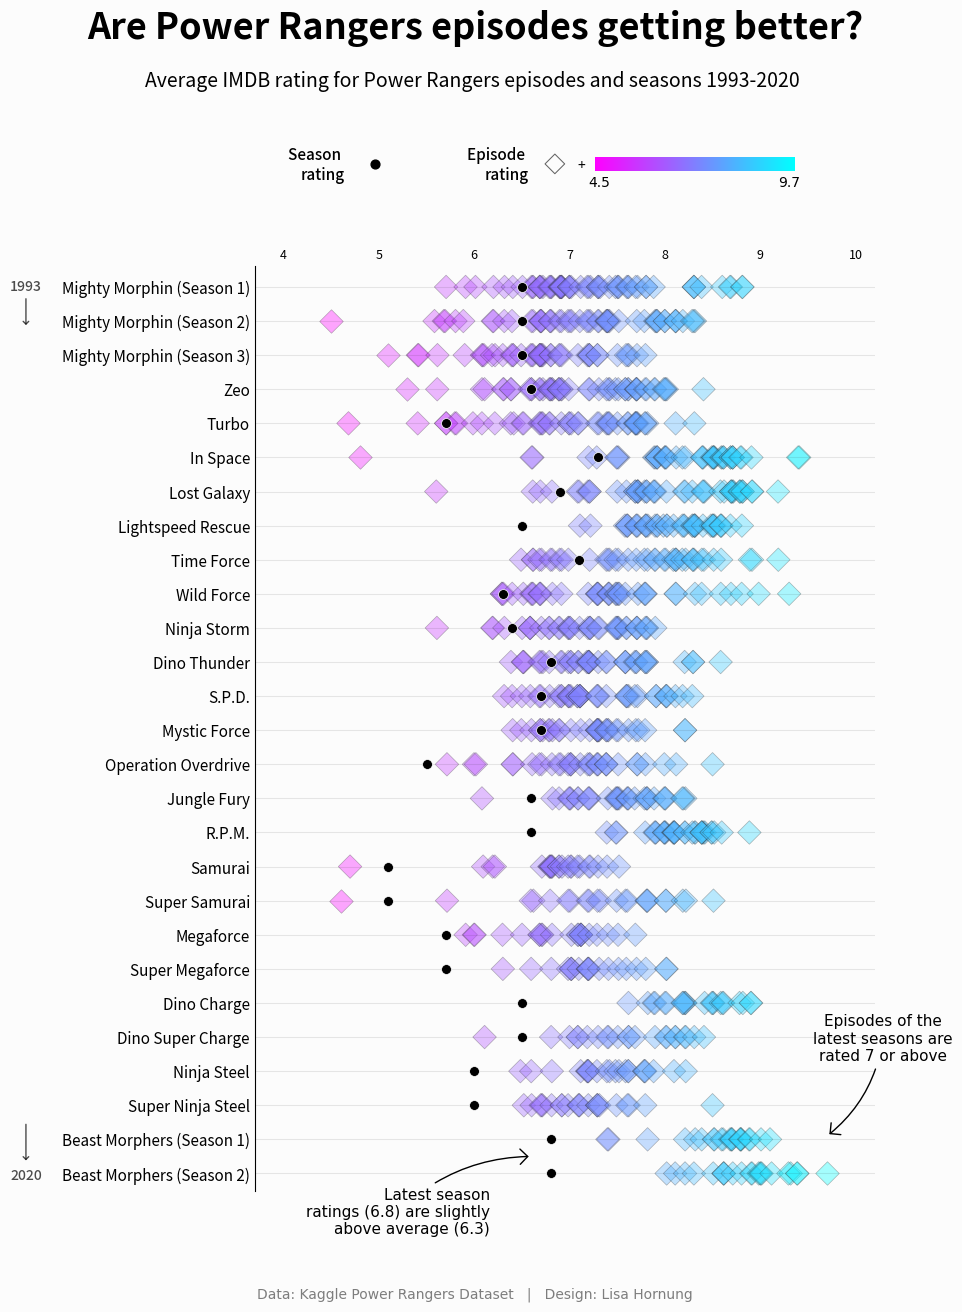

In [14]:
# setup fig
fig, ax = plt.subplots(figsize=(8,12))
bg = "#FCFCFC"
ax.set_facecolor(bg)
fig.set_facecolor(bg)

# plot episode ratings ----------------------
ax = sns.stripplot(
    data=df, x="IMDB_rating", y=df["season_num"], hue="IMDB_rating", 
    jitter=0.2, s=12, marker="D", linewidth=0.5, alpha=.35, native_scale=True,
    palette="cool_r", edgecolor="#333333", zorder=1, legend=False
)

# plot season ratings ----------------------
subset = df[["season_num", "IMDB_rating_season", "season_title"]].drop_duplicates().reset_index(drop=True)
for i in range(len(subset)):
    ax.scatter(y=subset["season_num"][i], x=subset["IMDB_rating_season"][i], zorder=3, 
           marker="o", s=50, color="black", edgecolors="white", linewidths=0.5)

# format axis ----------------------
ax.set_xlim(xmin=3.7, xmax=10.2)
ax.set_ylim(ymin=0.4, ymax=27.5)
ax.invert_yaxis()
ax.set_yticks(np.arange(1,28,1), subset["season_title"], fontproperties=label_font, fontsize=11)
for pos in ["top", "right", "bottom"]:
    ax.spines[pos].set_visible(False)
ax.set_ylabel("")
ax.set_xlabel("")
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, axis='x', length = 0, )
ax.tick_params(axis='y', length = 0)
ax.set_xticks(np.arange(4,11,1), np.arange(4,11,1), fontproperties=label_font,fontsize=9)
ax.grid(visible=True, axis='y', zorder=1, color = "#222222", alpha=0.1)

#legend --------------------------------
cbaxes = fig.add_axes([0.55, 0.96, 0.25, 0.011]) #axes to hold colorbar
cmappable = ScalarMappable(norm=Normalize(0,1), cmap="cool_r")              
cb = plt.colorbar(cmappable, cax=cbaxes, anchor=(1,1.2), orientation='horizontal', drawedges=False,ticks=[0.02,0.97])
cb.set_ticklabels([df["IMDB_rating"].min(), df["IMDB_rating"].max()])
cb.outline.set_visible(False)
cbaxes.tick_params(size=0)
cbaxes.text(-0.33, 0.4, "Episode \nrating", ha="right",va="center", size=11, fontproperties=subtitle_font )
cbaxes.scatter(-0.2,0.5, marker="D", clip_on=False, s=100, color="None", edgecolors="black", linewidth=0.75, alpha=0.6)
cbaxes.text(-0.05, 0.4, "+", ha="right",va="center", size=10, fontproperties=label_font )
cbaxes.text(-1.25, 0.4, "Season \nrating", ha="right",va="center", size=11, fontproperties=subtitle_font )
cbaxes.scatter(-1.1,0.5, marker="o", clip_on=False, s=40, color="black")

# Annotations ------------------------------------
ax.annotate('Episodes of the\nlatest seasons are\nrated 7 or above', xy=(9.7,  25.9), xycoords='data', xytext=(40, 70), textcoords='offset points', 
                    fontsize=11, ha='center', va='center', annotation_clip=False,
                    arrowprops=dict(arrowstyle="->, head_width=0.5, head_length=0.5", facecolor='black',connectionstyle="arc3,rad=-0.2"))
ax.annotate('Latest season\nratings (6.8) are slightly\nabove average (6.3)', xy=(6.6,  26.5), xycoords='data', xytext=(-30, -40), textcoords='offset points', 
                    fontsize=11, ha='right', va='center', annotation_clip=False,
                    arrowprops=dict(arrowstyle="->, head_width=0.5, head_length=0.5", facecolor='black',connectionstyle="arc3,rad=-0.2"))
ax.annotate('1993', xy=(1.3, 2.2), xycoords='data', xytext=(0, 30), textcoords='offset points', alpha=0.7,
                    fontsize=10, ha='center', va='center', annotation_clip=False, font_properties=subtitle_font,
                    arrowprops=dict(arrowstyle="->, head_width=0.2, head_length=0.2", facecolor='black',alpha=0.7))
ax.annotate('', xy=(1.3, 26.7), xycoords='data', xytext=(0, 30), textcoords='offset points', 
                    fontsize=10, ha='center', va='center', annotation_clip=False, font_properties=subtitle_font,
                    arrowprops=dict(facecolor='black', arrowstyle="->, head_width=0.2, head_length=0.2", alpha=0.7))
ax.text(1.3, 27.05, "2020", ha="center",va="center", size=10, fontproperties=subtitle_font ,alpha=0.7)

# Title and footer ---------------------------
plt.figtext(0.4,1.07, "Are Power Rangers episodes getting better?", fontproperties = title_font, fontsize=26, ha="center")
plt.figtext(0.4,1.03, "Average IMDB rating for Power Rangers episodes and seasons 1993-2020 ", fontproperties = label_font, fontsize=14, ha="center")
plt.figtext(0.4,0.02, "Data: Kaggle Power Rangers Dataset   |   Design: Lisa Hornung", fontsize=10,  ha="center", alpha=0.5)

# save
plt.savefig("power-rangers-episode-ratings.png", bbox_inches='tight', dpi=90, pad_inches=1)
plt.savefig("power-rangers-episode-ratings.svg", )

plt.show()

In [285]:
subset["IMDB_rating_season"].describe()

count    27.000000
mean      6.348148
std       0.565257
min       5.100000
25%       6.000000
50%       6.500000
75%       6.700000
max       7.300000
Name: IMDB_rating_season, dtype: float64

## Playground

In [3]:
episodes.columns

Index(['season_title', 'episode_num', 'episode_title', 'air_date',
       'IMDB_rating', 'total_votes', 'desc'],
      dtype='object')

In [6]:
seasons.columns

Index(['season_title', 'season_num', 'number_of_episodes', 'air_date_first_ep',
       'air_date_last_ep', 'producer', 'IMDB_rating'],
      dtype='object')

In [18]:
df.columns

Index(['season_title', 'episode_num', 'episode_title', 'air_date',
       'IMDB_rating_x', 'total_votes', 'desc', 'season_num',
       'number_of_episodes', 'air_date_first_ep', 'air_date_last_ep',
       'producer', 'IMDB_rating_season'],
      dtype='object')

In [22]:
df.groupby(["season_num","season_title"])["episode_num"].max()

season_num  season_title             
1           Mighty Morphin (Season 1)    60
2           Mighty Morphin (Season 2)    52
3           Mighty Morphin (Season 3)    43
4           Zeo                          50
5           Turbo                        45
6           In Space                     43
7           Lost Galaxy                  45
8           Lightspeed Rescue            40
9           Time Force                   40
10          Wild Force                   40
11          Ninja Storm                  38
12          Dino Thunder                 38
13          S.P.D.                       38
14          Mystic Force                 32
15          Operation Overdrive          32
16          Jungle Fury                  32
17          R.P.M.                       32
18          Samurai                      24
19          Super Samurai                22
20          Megaforce                    22
21          Super Megaforce              20
22          Dino Charge               

In [64]:
df["IMDB_rating"].dtype

dtype('float64')

In [65]:
df["IMDB_rating_season"].dtype

dtype('float64')

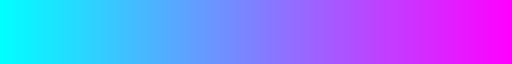

In [109]:
cmap = load_cmap('Ernst', cmap_type='discrete', type_warning = False,reverse=True, keep=[True,False, False, True, False, True, False, True])
cmap = load_cmap('Bay', cmap_type='discrete', reverse=False, type_warning = False, keep=[False, True, True, True, True ])
cmap = load_cmap('BillyApple', cmap_type='discrete', reverse=True, type_warning = False, keep=[True, True, True, False, True ])
cmap = load_cmap('Bay', cmap_type='discrete', reverse=False, type_warning = False, keep=[False, True, True, True, True ])
cmap = load_cmap('Diamonds', cmap_type='discrete', reverse=False, type_warning = False, keep=[True, False, False, True, True, True, False,True, False ])
cmap = load_cmap('Klimt', cmap_type='discrete', reverse=False, type_warning = False, keep=[False, True, True, False, True, True ])
cmap = load_cmap("cool", cmap_type='discrete', reverse=False, type_warning = False, )
cmap

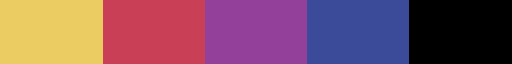

In [5]:
# Customise colour palette
import matplotlib.colors as mcolors

colors = ['#EACC62FF', '#C93F55FF', '#924099FF', '#3C4B99FF', '#000000']
cmap_new = mcolors.ListedColormap(colors)
cmap_new

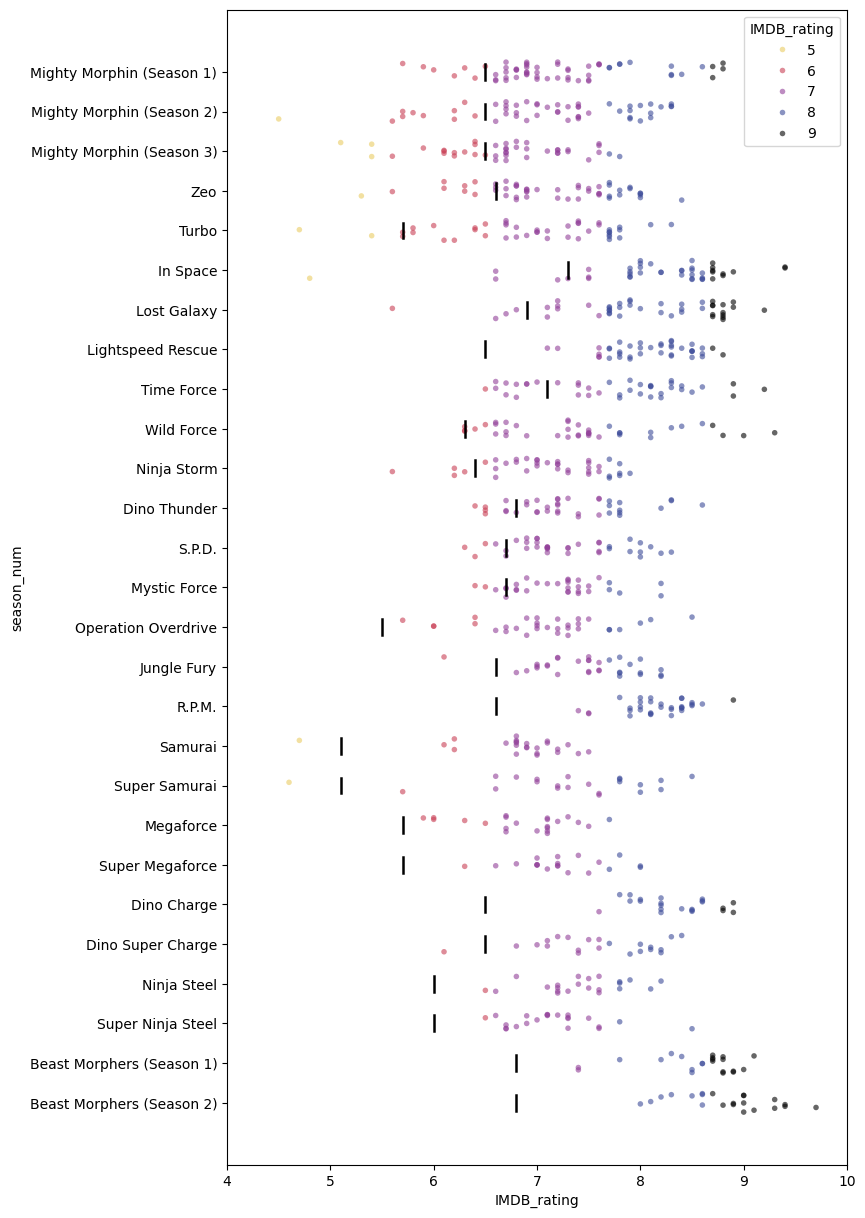

In [101]:
# setup fig
fig, ax = plt.subplots(figsize=(8,15))

# plot episode ratings
ax = sns.stripplot(
    data=df, x="IMDB_rating", y=df["season_num"].astype("category"), 
    hue="IMDB_rating",
    jitter=0.25, s=4, marker="o", linewidth=0, alpha=.6, native_scale=True,
    palette=cmap_new, edgecolor="#333333",
    #vmin=5, vmax=10, 
    zorder=1,
    legend=True
)

# plot season ratings
subset = df[["season_num", "IMDB_rating_season", "season_title"]].drop_duplicates().reset_index(drop=True)

'''
for i in range(len(subset)):
    ax.scatter(y=subset["season_num"][i]-1, x=subset["IMDB_rating_season"][i], zorder=3, 
           marker="o", s=45,
           color="black", edgecolors="white", linewidths=0.5)
'''
for i in range(len(subset)):
    ax.plot([subset["IMDB_rating_season"].tolist()[::-1][i],subset["IMDB_rating_season"].tolist()[::-1][i]],
            [subset["season_num"].tolist()[::-1][i]-1+0.2, subset["season_num"].tolist()[::-1][i]-1-0.2],
            linewidth=1.8, color="black")


ax.set_xlim(xmin=4, xmax=10)
#ax.axis("off")
ax.set_yticks(ax.get_yticks(), subset["season_title"])
plt.show()

#ax.set_yticklabels()



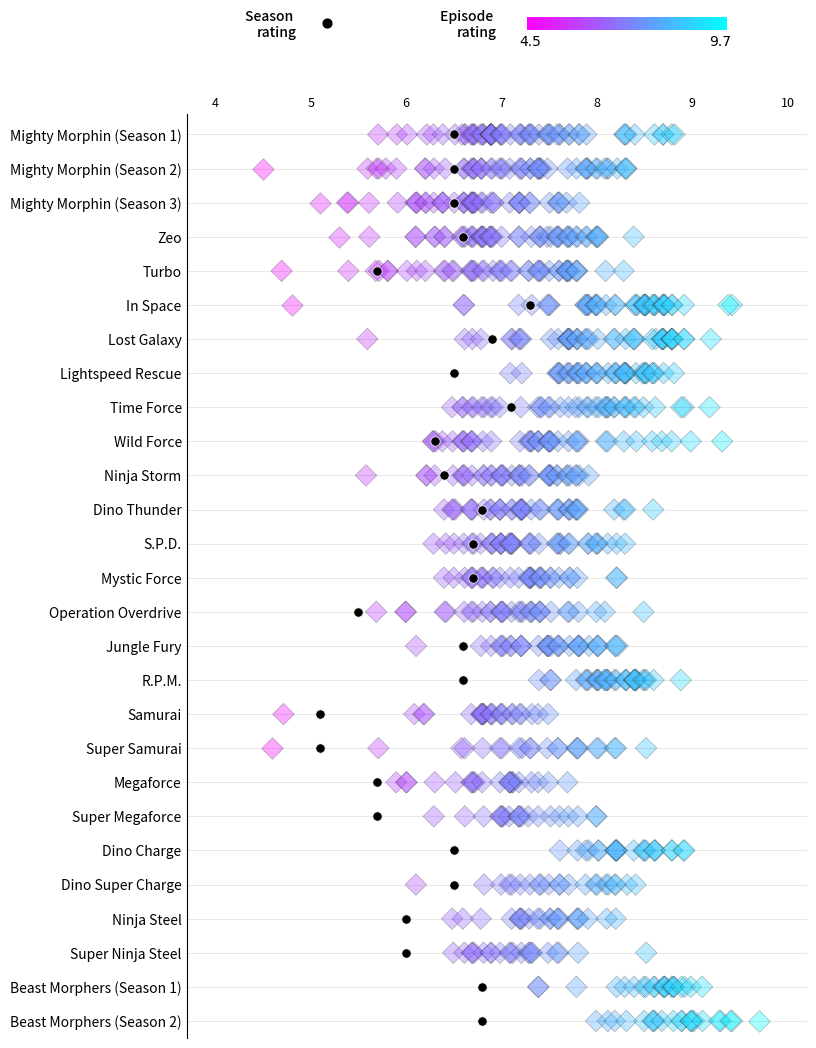

In [207]:
# setup fig
fig, ax = plt.subplots(figsize=(8,12))

# plot episode ratings ----------------------
ax = sns.stripplot(
    data=df, x="IMDB_rating", y=df["season_num"], hue="IMDB_rating", 
    jitter=0.2, s=11, marker="D", linewidth=0.5, alpha=.35, native_scale=True,
    palette="cool_r", edgecolor="#333333",
    zorder=1, legend=False
)

# plot season ratings ----------------------
subset = df[["season_num", "IMDB_rating_season", "season_title"]].drop_duplicates().reset_index(drop=True)
for i in range(len(subset)):
    ax.scatter(y=subset["season_num"][i], x=subset["IMDB_rating_season"][i], zorder=3, 
           marker="o", s=45,
           color="black", edgecolors="white", linewidths=0.5)

'''
for i in range(len(subset)):
    ax.plot([subset["IMDB_rating_season"].tolist()[::-1][i],subset["IMDB_rating_season"].tolist()[::-1][i]],
            [subset["season_num"].tolist()[::-1][i]-1+0.2, subset["season_num"].tolist()[::-1][i]-1-0.2],
            linewidth=1.8, color="black")
'''

# format axis ----------------------
ax.set_xlim(xmin=3.7, xmax=10.2)
ax.set_ylim(ymin=0.4, ymax=27.5)
ax.invert_yaxis()
ax.set_yticks(np.arange(1,28,1), subset["season_title"], fontproperties=label_font)
for pos in ["top", "right", "bottom"]:
    ax.spines[pos].set_visible(False)
ax.set_ylabel("")
ax.set_xlabel("")
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, axis='x', length = 0, )
ax.tick_params(axis='y', length = 0)
ax.set_xticks(np.arange(4,11,1), np.arange(4,11,1), fontproperties=label_font,fontsize=9)
ax.grid(visible=True, axis='y', zorder=1, color = "#222222", alpha=0.1)

#colorbar
cbaxes = fig.add_axes([0.55, 0.95, 0.25, 0.011]) #axes to hold colorbar
cmappable = ScalarMappable(norm=Normalize(0,1), cmap="cool_r")              
cb = plt.colorbar(cmappable, cax=cbaxes, anchor=(1,1.2), orientation='horizontal', drawedges=False,ticks=[0.02,0.97])
cb.set_ticklabels([df["IMDB_rating"].min(), df["IMDB_rating"].max()])
cb.outline.set_visible(False)
cbaxes.tick_params(size=0)
cbaxes.text(-0.15, 0.4, "Episode \nrating", ha="right",va="center", size=10, fontproperties=subtitle_font )
cbaxes.text(-1.15, 0.4, "Season \nrating", ha="right",va="center", size=10, fontproperties=subtitle_font )
cbaxes.scatter(-1,0.5, marker="o", clip_on=False, s=40, color="black")

plt.show()


In [48]:
subset["IMDB_rating_season"].tolist()[::-1]

6.8

In [34]:
df.groupby("season_num")["total_votes"].mean()

season_num
1     472.688525
2     424.288462
3     412.906977
4     281.220000
5     262.222222
6     280.697674
7     202.133333
8      85.075000
9      52.575000
10     56.400000
11     49.736842
12     65.210526
13     55.052632
14     48.218750
15     29.125000
16     36.187500
17     43.312500
18     44.333333
19     31.454545
20     40.090909
21     45.100000
22     46.909091
23     32.136364
24     37.272727
25     28.954545
26     38.454545
27     30.181818
Name: total_votes, dtype: float64

In [27]:
subset

,season_num,IMDB_rating_season
0,1,6.5
1,2,6.5
2,3,6.5
3,4,6.6
4,5,5.7
5,6,7.3
6,7,6.9
7,8,6.5
8,9,7.1
9,10,6.3


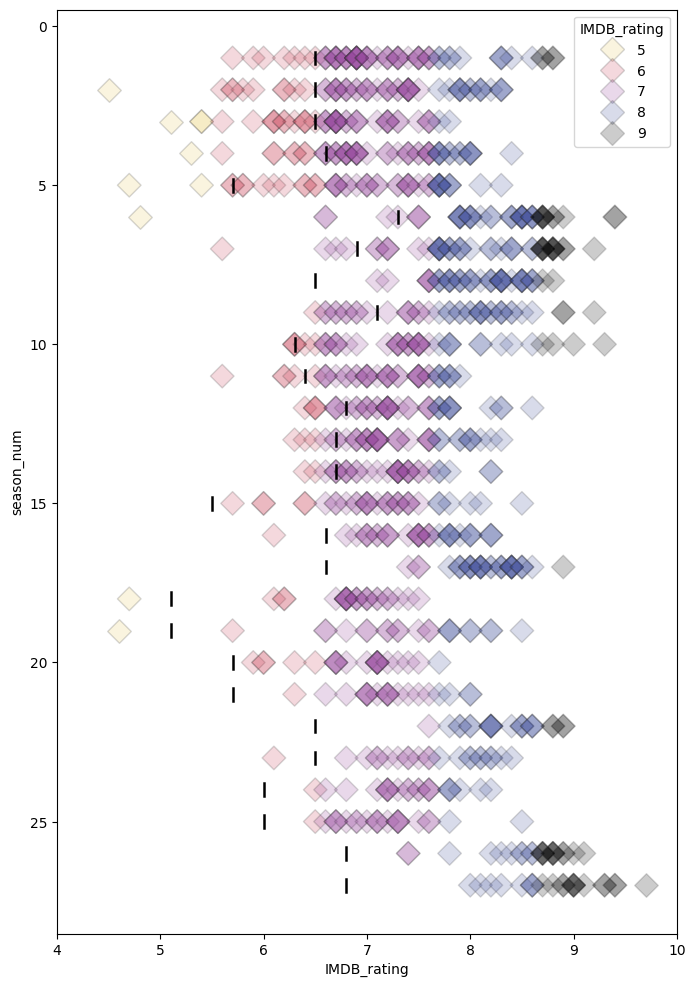

In [6]:
# setup fig
fig, ax = plt.subplots(figsize=(8,12))

# plot episode ratings
ax = sns.stripplot(
    data=df, x="IMDB_rating", y="season_num", 
    hue="IMDB_rating",
    jitter=False, s=12, marker="D", linewidth=1, alpha=.2, native_scale=True,
    palette=cmap_new, edgecolor="#333333",
    #vmin=5, vmax=10, 
    zorder=1,
    legend=True
)

# plot season ratings
subset = df[["season_num", "IMDB_rating_season"]].drop_duplicates().reset_index(drop=True)
#ax.scatter(y=subset["season_num"], x=subset["IMDB_rating_season"], zorder=3, 
#           marker="o", s=20,
#           color="black", edgecolors="white", linewidths=0)

for i in range(len(subset)):
    ax.plot([subset["IMDB_rating_season"][i],subset["IMDB_rating_season"][i]],
            [subset["season_num"][i]+0.2, subset["season_num"][i]-0.2],
            linewidth=1.8, color="black")

#subset = seasons[seasons["season_num"]<29]
#ax.scatter(y=subset["season_num"], x=subset["IMDB_rating"])

ax.invert_yaxis()
ax.set_xlim(xmin=4, xmax=10)
#ax.axis("off")
plt.show()

In [69]:
df.describe()

,episode_num,IMDB_rating,total_votes,season_num,number_of_episodes,IMDB_rating_season
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,19.298588,7.450054,155.446254,11.583062,37.144408,6.420304
std,12.639521,0.804554,155.395175,7.584731,11.208003,0.516479
min,0.000000,4.500000,19.000000,1.000000,20.000000,5.100000
25%,9.000000,6.900000,40.000000,5.000000,32.000000,6.300000
50%,18.000000,7.400000,55.000000,11.000000,38.000000,6.500000
75%,28.000000,8.000000,272.000000,17.000000,45.000000,6.700000
max,60.000000,9.700000,687.000000,27.000000,60.000000,7.300000


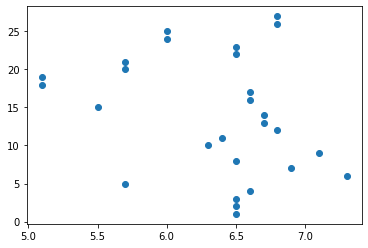

In [44]:
subset  = df[["season_num", "IMDB_rating_season"]].drop_duplicates().reset_index(drop=True)
plt.scatter(y=subset["season_num"], x=subset["IMDB_rating_season"])

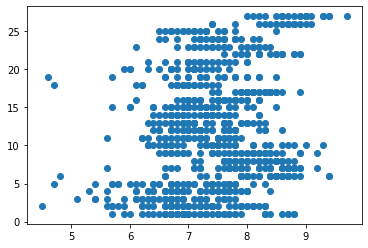

In [55]:
#subset  = df[["season_num", "IMDB_rating_season"]].drop_duplicates().reset_index(drop=True)
plt.scatter(y=df["season_num"], x=df["IMDB_rating"])

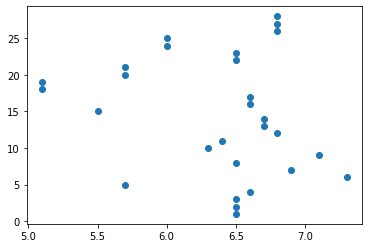

In [51]:
subset = seasons[seasons["season_num"]<29]
plt.scatter(y=subset["season_num"], x=subset["IMDB_rating"])